# Netflix Recommendation Project 

In [10]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# Reading dataset file
df = pd.read_csv(r"C:\Users\ardra\Downloads\combined_data_1.txt",header = None, names = ['Cust_Id', 'Rating'], usecols = [0,1])


In [12]:
df

,Cust_Id,Rating
0,1:,NaN
1,1488844,3.0
2,822109,5.0
3,885013,4.0
4,30878,4.0
...,...,...
24058258,2591364,2.0
24058259,1791000,2.0
24058260,512536,5.0
24058261,988963,3.0


In [13]:
df.shape

(24058263, 2)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24058263 entries, 0 to 24058262
Data columns (total 2 columns):
 #   Column   Dtype  
---  ------   -----  
 0   Cust_Id  object 
 1   Rating   float64
dtypes: float64(1), object(1)
memory usage: 367.1+ MB


In [15]:
df.isnull().sum()

Cust_Id       0
Rating     4499
dtype: int64

In [17]:
#Null values count - Movie count
movie_count= df.isnull().sum()
movie_count = movie_count['Rating']
movie_count

4499

In [18]:
#Count of customers with NAN values - Unique values of Cust_Id
cust_count = df['Cust_Id'].nunique()
cust_count

475257

In [19]:
#Actual number of customers
customer_count = cust_count - movie_count
customer_count

470758

In [20]:
#Total number of ratings
rating_count = df['Rating'].count() 
rating_count

24053764

In [21]:
#To find out how many people have rated the movies as 1,2,3,4 and 5 stars ratings to the movies
stars = df.groupby('Rating')['Rating'].agg(['count'])
stars

,count
Rating,
1.0,1118186
2.0,2439073
3.0,6904181
4.0,8085741
5.0,5506583


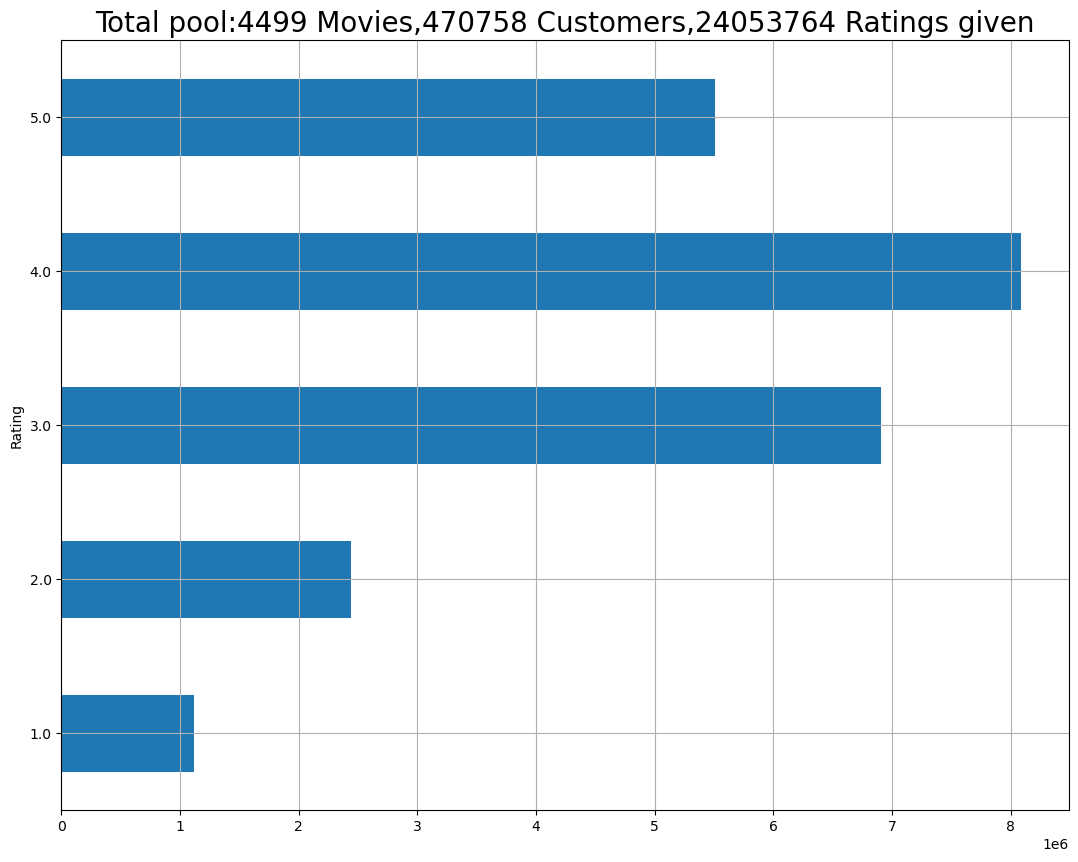

In [22]:
ax = stars.plot(kind='barh',legend=False,figsize=(13,10))
plt.title(f"Total pool:{movie_count} Movies,{customer_count} Customers,{rating_count} Ratings given",fontsize=20)
plt.grid(True)

In [23]:
#Null values in ratings column
df_nan = pd.DataFrame(pd.isnull(df.Rating))
df_nan

,Rating
0,True
1,False
2,False
3,False
4,False
...,...
24058258,False
24058259,False
24058260,False
24058261,False


In [24]:
df_nan = df_nan[df_nan['Rating']==True]
df_nan

,Rating
0,True
548,True
694,True
2707,True
2850,True
...,...
24046714,True
24047329,True
24056849,True
24057564,True


In [25]:
df_nan.shape

(4499, 1)

In [26]:
#Reset the index as column
df_nan = df_nan.reset_index()
df_nan

,index,Rating
0,0,True
1,548,True
2,694,True
3,2707,True
4,2850,True
...,...,...
4494,24046714,True
4495,24047329,True
4496,24056849,True
4497,24057564,True


In [28]:
#Create a numpy array containing movie_id
movie_np =[]
movie_id = 1
for i,j in zip(df_nan['index'][1:],df_nan['index'][:-1]):
    temp = np.full((1,i-j-1),movie_id)
    movie_np = np.append(movie_np,temp)
    movie_id+=1
temp = np.full((1,24058262-24057834),movie_id)
movie_np = np.append(movie_np,temp)

In [29]:
df = df[pd.notnull(df['Rating'])]
df['Movie_Id'] = movie_np.astype(int)
df['Cust_Id'] = df['Cust_Id'].astype(int)
print("New Dataset")
df

C:\Users\ardra\AppData\Local\Temp\ipykernel_8844\4278027392.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Movie_Id'] = movie_np.astype(int)


New Dataset


C:\Users\ardra\AppData\Local\Temp\ipykernel_8844\4278027392.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Cust_Id'] = df['Cust_Id'].astype(int)


,Cust_Id,Rating,Movie_Id
1,1488844,3.0,1
2,822109,5.0,1
3,885013,4.0,1
4,30878,4.0,1
5,823519,3.0,1
...,...,...,...
24058258,2591364,2.0,4499
24058259,1791000,2.0,4499
24058260,512536,5.0,4499
24058261,988963,3.0,4499


Now we will remove all the users that have rated less movies and also all those movies that has been rated less in numbers


In [30]:
f = ['count','mean']

In [31]:
df_movie_summary = df.groupby('Movie_Id').agg(f)

In [32]:
df_movie_summary

Cust_Id               Rating          
           count          mean  count      mean
Movie_Id                                       
1            547  1.249876e+06    547  3.749543
2            145  1.341926e+06    145  3.558621
3           2012  1.324290e+06   2012  3.641153
4            142  1.402854e+06    142  2.739437
5           1140  1.302384e+06   1140  3.919298
...          ...           ...    ...       ...
4495         614  1.321093e+06    614  3.478827
4496        9519  1.332006e+06   9519  3.763000
4497         714  1.330543e+06    714  2.715686
4498         269  1.262035e+06    269  2.464684
4499         428  1.270551e+06    428  2.614486

[4499 rows x 4 columns]

In [33]:
df_movie_summary = df.groupby('Movie_Id')['Rating'].agg(f)
df_movie_summary

,count,mean
Movie_Id,,
1,547,3.749543
2,145,3.558621
3,2012,3.641153
4,142,2.739437
5,1140,3.919298
...,...,...
4495,614,3.478827
4496,9519,3.763000
4497,714,2.715686


In [34]:
df_movie_summary['count'].quantile(0.7)

1798.6

In [35]:
#Now we will create a benchmark
movie_benchmark = round(df_movie_summary['count'].quantile(0.7),0)
movie_benchmark

1799.0

In [36]:
#Making a list of movies which is rated by less than 70% of the users
drop_movie_list = df_movie_summary[df_movie_summary['count']<movie_benchmark].index
drop_movie_list

Index([   1,    2,    4,    5,    6,    7,    9,   10,   11,   12,
       ...
       4484, 4486, 4487, 4489, 4491, 4494, 4495, 4497, 4498, 4499],
      dtype='int32', name='Movie_Id', length=3149)

In [37]:
#Now we will remove all the users who are in-active
df_cust_summary = df.groupby('Cust_Id')['Rating'].agg(f)
df_cust_summary

,count,mean
Cust_Id,,
6,153,3.333333
7,195,4.066667
8,21,4.000000
10,49,3.346939
25,4,3.500000
...,...,...
2649404,12,4.083333
2649409,10,4.000000
2649421,3,5.000000


In [38]:
#Now we will create a benchmark
cust_benchmark = round(df_cust_summary['count'].quantile(0.7),0)
cust_benchmark

52.0

In [39]:
#Making a list of customers who have rated less than 52 movies
drop_cust_list = df_cust_summary[df_cust_summary['count']<cust_benchmark].index
drop_cust_list

Index([      8,      10,      25,      33,      42,      59,      83,      87,
            94,     116,
       ...
       2649343, 2649351, 2649375, 2649376, 2649379, 2649384, 2649401, 2649404,
       2649409, 2649421],
      dtype='int32', name='Cust_Id', length=327300)

In [40]:
print('The original Dataframe has:',df.shape,'shape')

The original Dataframe has: (24053764, 3) shape


In [41]:
df = df[~df['Movie_Id'].isin(drop_movie_list)]

In [42]:
df = df[~df['Cust_Id'].isin(drop_cust_list)]

In [43]:
print("After trimmimg the shape is:",df.shape)

After trimmimg the shape is: (17337458, 3)


Now  we will prepare the data for SVD and it takes the matrix as the input. So for input,we will convert the dataset into sparse matrix.

In [44]:
df_title =pd.read_csv(r'C:\Users\ardra\OneDrive\Desktop\movie_titles.csv',encoding='ISO-8859-1',
                      header=None,usecols=[0,1,2],names=['Movie_Id','Year','Name'])
df_title.set_index('Movie_Id',inplace=True)

In [45]:
df_title.head(20)

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
6,1997.0,Sick
7,1992.0,8 Man
8,2004.0,What the #$*! Do We Know!?
9,1991.0,Class of Nuke 'Em High 2


In [46]:
!pip install scikit-surprise

# Model Building


In [47]:
import math 
from surprise import Reader,Dataset,SVD
from surprise.model_selection import cross_validate

In [48]:
reader = Reader()

In [49]:
data = Dataset.load_from_df(df[['Cust_Id','Movie_Id','Rating']][:100000],reader)


In [50]:
svd=SVD()

In [51]:
cross_validate(svd,data,measures=['RMSE','MAE'],verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0030  0.9907  0.9979  0.9941  1.0012  0.9974  0.0045  
MAE (testset)     0.7976  0.7863  0.7982  0.7873  0.7944  0.7928  0.0050  
Fit time          3.13    2.93    3.01    3.07    2.94    3.01    0.07    
Test time         0.28    0.23    0.44    0.43    0.42    0.36    0.09    


{'test_rmse': array([1.00304045, 0.9907405 , 0.99785614, 0.99410285, 1.00115345]),
 'test_mae': array([0.79758528, 0.78633069, 0.79824378, 0.78728382, 0.79438638]),
 'fit_time': (3.1252784729003906,
  2.929626703262329,
  3.005652904510498,
  3.0665159225463867,
  2.944284439086914),
 'test_time': (0.2837357521057129,
  0.23317170143127441,
  0.43910789489746094,
  0.42556095123291016,
  0.42405056953430176)}

In [52]:
df.head()

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
697,1331154,4.0,3
698,2632461,3.0,3
699,44937,5.0,3
700,656399,4.0,3


We first take user 712664 and try to recommend some movies based on past data.

In [54]:
dataset_712664 = df[(df['Cust_Id']==712664)& (df['Rating']==5)]
dataset_712664

,Cust_Id,Rating,Movie_Id
696,712664,5.0,3
308787,712664,5.0,79
577555,712664,5.0,175
898451,712664,5.0,199
1019562,712664,5.0,241
...,...,...,...
20461546,712664,5.0,3887
21752209,712664,5.0,4109
22487781,712664,5.0,4266
23397883,712664,5.0,4384


In [55]:
df_title

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [56]:
#Now we will buld the recommendation system
user_712664=df_title.copy()
user_712664

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [57]:
user_712664=df_title.reset_index()
user_712664

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [58]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_movie_list)]
user_712664 

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [59]:
#Droping films already watched by user
drop_list = dataset_712664['Movie_Id']
drop_list = list(drop_list)
print(drop_list)

[3, 79, 175, 199, 241, 256, 348, 357, 416, 442, 457, 501, 561, 571, 708, 733, 788, 798, 872, 996, 1032, 1102, 1202, 1255, 1370, 1425, 1571, 1595, 1625, 1632, 1646, 1665, 1728, 1770, 1798, 1821, 1856, 1865, 1905, 2111, 2122, 2129, 2130, 2139, 2430, 2452, 2456, 2462, 2470, 2518, 2640, 2743, 2848, 2862, 2905, 2922, 2960, 2965, 2986, 3054, 3147, 3168, 3223, 3224, 3269, 3285, 3290, 3309, 3342, 3434, 3453, 3469, 3544, 3605, 3611, 3626, 3650, 3713, 3728, 3887, 4109, 4266, 4384, 4392]


In [60]:
user_712664=user_712664[~user_712664['Movie_Id'].isin(drop_list)]
user_712664 

,Movie_Id,Year,Name
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
25,26,2004.0,Never Die Alone
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [61]:
user_712664['Estimate_score']=user_712664['Movie_Id'].apply(lambda x:svd.predict(712664,x).est)
user_712664

C:\Users\ardra\AppData\Local\Temp\ipykernel_8844\2897996089.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_712664['Estimate_score']=user_712664['Movie_Id'].apply(lambda x:svd.predict(712664,x).est)


,Movie_Id,Year,Name,Estimate_score
7,8,2004.0,What the #$*! Do We Know!?,2.990512
15,16,1996.0,Screamers,3.118216
16,17,2005.0,7 Seconds,3.076951
17,18,1994.0,Immortal Beloved,4.005930
25,26,2004.0,Never Die Alone,3.055591
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.743600
17766,17767,2004.0,Fidel Castro: American Experience,3.743600
17767,17768,2000.0,Epoch,3.743600
17768,17769,2003.0,The Company,3.743600


In [62]:
user_712664 = user_712664.drop('Movie_Id',axis=1)

In [63]:
user_712664 = user_712664.sort_values('Estimate_score')
user_712664

,Year,Name,Estimate_score
7,2004.0,What the #$*! Do We Know!?,2.990512
25,2004.0,Never Die Alone,3.055591
16,2005.0,7 Seconds,3.076951
15,1996.0,Screamers,3.118216
12918,1970.0,Chisum,3.743600
...,...,...,...
8083,1983.0,G.I. Joe: Season 1: Part 1,3.743600
17769,2003.0,Alien Hunter,3.743600
27,2002.0,Lilo and Stitch,3.872704
29,2003.0,Something's Gotta Give,3.893126


In [64]:
user_712664 = user_712664.sort_values('Estimate_score',ascending=False)
user_712664.head(10)

,Year,Name,Estimate_score
17,1994.0,Immortal Beloved,4.005930
29,2003.0,Something's Gotta Give,3.893126
27,2002.0,Lilo and Stitch,3.872704
76,1995.0,Congo,3.743600
43,1996.0,Spitfire Grill,3.743600
44,1999.0,The Love Letter,3.743600
45,1964.0,Rudolph the Red-Nosed Reindeer,3.743600
46,1952.0,The Bad and the Beautiful,3.743600
47,2001.0,Justice League,3.743600
51,2002.0,The Weather Underground,3.743600


We now take user 2298769 and try to recommend some movies based on past data.

In [66]:
dataset_2298769 = df[(df['Cust_Id']==2298769)& (df['Rating']==5)]
dataset_2298769

,Cust_Id,Rating,Movie_Id
644670,2298769,5.0,175
924769,2298769,5.0,199
1051520,2298769,5.0,241
1118096,2298769,5.0,256
2456492,2298769,5.0,457
3128760,2298769,5.0,571
3406658,2298769,5.0,646
4458941,2298769,5.0,872
4588818,2298769,5.0,889
4827873,2298769,5.0,963


In [67]:
#Now we will buld the recommendation system
user_2298769=df_title.copy()
user_2298769

,Year,Name
Movie_Id,,
1,2003.0,Dinosaur Planet
2,2004.0,Isle of Man TT 2004 Review
3,1997.0,Character
4,1994.0,Paula Abdul's Get Up & Dance
5,2004.0,The Rise and Fall of ECW
...,...,...
17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17767,2004.0,Fidel Castro: American Experience
17768,2000.0,Epoch


In [68]:
user_2298769 = df_title.reset_index()
user_2298769

,Movie_Id,Year,Name
0,1,2003.0,Dinosaur Planet
1,2,2004.0,Isle of Man TT 2004 Review
2,3,1997.0,Character
3,4,1994.0,Paula Abdul's Get Up & Dance
4,5,2004.0,The Rise and Fall of ECW
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [69]:
user_2298769=user_2298769[~user_2298769['Movie_Id'].isin(drop_movie_list)]
user_2298769 

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [70]:
#Droping films already watched by user
drop_list = dataset_2298769['Movie_Id']
drop_list = list(drop_list)
print(drop_list)

[175, 199, 241, 256, 457, 571, 646, 872, 889, 963, 1324, 1595, 1700, 1770, 1865, 2430, 2452, 2862, 3290, 3355, 3506, 3824, 3886, 3900, 4284, 4353]


In [71]:
user_2298769=user_2298769[~user_2298769['Movie_Id'].isin(drop_list)]
user_2298769 

,Movie_Id,Year,Name
2,3,1997.0,Character
7,8,2004.0,What the #$*! Do We Know!?
15,16,1996.0,Screamers
16,17,2005.0,7 Seconds
17,18,1994.0,Immortal Beloved
...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...
17766,17767,2004.0,Fidel Castro: American Experience
17767,17768,2000.0,Epoch
17768,17769,2003.0,The Company


In [72]:
user_2298769['Estimate_score']=user_2298769['Movie_Id'].apply(lambda x:svd.predict(2298769,x).est)
user_2298769

C:\Users\ardra\AppData\Local\Temp\ipykernel_8844\4231508825.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  user_2298769['Estimate_score']=user_2298769['Movie_Id'].apply(lambda x:svd.predict(2298769,x).est)


,Movie_Id,Year,Name,Estimate_score
2,3,1997.0,Character,3.824974
7,8,2004.0,What the #$*! Do We Know!?,2.474731
15,16,1996.0,Screamers,2.626497
16,17,2005.0,7 Seconds,2.971717
17,18,1994.0,Immortal Beloved,3.918299
...,...,...,...,...
17765,17766,2002.0,Where the Wild Things Are and Other Maurice Se...,3.396025
17766,17767,2004.0,Fidel Castro: American Experience,3.396025
17767,17768,2000.0,Epoch,3.396025
17768,17769,2003.0,The Company,3.396025


In [73]:
user_2298769 = user_2298769.drop('Movie_Id',axis=1)

In [74]:
user_2298769 = user_2298769.sort_values('Estimate_score',ascending=False)
user_2298769.head(10)

,Year,Name,Estimate_score
17,1994.0,Immortal Beloved,3.918299
2,1997.0,Character,3.824974
27,2002.0,Lilo and Stitch,3.774873
29,2003.0,Something's Gotta Give,3.664861
12904,1993.0,Paul McCartney: Paul is Live in Concert,3.396025
12909,1981.0,The Devil & Max Devlin,3.396025
12908,1983.0,A Christmas Story: 20th Anniversary Edition: B...,3.396025
12907,1996.0,Faithful,3.396025
12906,1995.0,Nelly and Monsieur Arnaud,3.396025
12905,1962.0,The Three Stooges in Orbit,3.396025
